### Project Python Notebook

## The Data

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Variable for the csv file (place path in this one)

In [ ]:
avall = pd.read_csv('/content/drive/MyDrive/Spring 2025/CS 133/Aviation Accidents/avall csv/avall.csv', encoding = "latin")

<ipython-input-294-f0086443bb0c>:1: DtypeWarning: Columns (34,42,44,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  avall = pd.read_csv('/content/drive/MyDrive/Spring 2025/CS 133/Aviation Accidents/avall csv/avall.csv', encoding = "latin")


Main dataframe

In [ ]:
avallFrame = pd.DataFrame(data=avall)
avallFrame

# Cleaning up unnecessary columns
avallclean = avallFrame[['damage', 'acft_make', 'acft_model',
                        'acft_series', 'acft_category', 'date_last_insp',
                        'dprt_apt_id', 'dprt_city', 'dprt_state',
                        'dest_apt_id', 'dest_city', 'dest_state',
                        'acft_year', 'lchg_date']]

# Drop NaN values
avallclean = avallclean.dropna()

# Drop columns that are not airplanes
avallclean['acft_year'] = pd.to_numeric(avallclean['acft_year'], downcast='integer', errors='coerce')

avallclean

<ipython-input-295-7560d8a1f82f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avallclean['acft_year'] = pd.to_numeric(avallclean['acft_year'], downcast='integer', errors='coerce')


,damage,acft_make,acft_model,acft_series,acft_category,date_last_insp,dprt_apt_id,dprt_city,dprt_state,dest_apt_id,dest_city,dest_state,acft_year,lchg_date
4556,SUBS,Cessna,172,M,AIR,6/2/2013,U77,Springville,UT,U77,Springville,UT,1974,9/25/2020 15:16
4565,SUBS,PIPER,PA 28-235,235,AIR,9/1/2013,10CO,Mack,CO,10CO,Mack,CO,1966,9/25/2020 15:10
4578,SUBS,FUNK,B85C,NO SERIES,AIR,12/10/2014,RVS,Tulsa,OK,RVS,TULSA,OK,1946,9/25/2020 14:31
4579,SUBS,PIPER,PA32R - 301,301,AIR,9/1/2014,GTF,Great Falls,MT,SDL,Scottsdale,AZ,2001,9/25/2020 14:31
4580,DEST,Cessna,182,P,AIR,10/1/2014,BGF,Winchester,TN,BGF,Winchester,TN,1975,9/25/2020 14:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28956,SUBS,Cessna,177,B,AIR,10/14/2022,EVV,Evansville,IN,DKB,DeKalb,IL,1969,12/13/2023 14:59
28959,SUBS,BELL HELICOPTER TEXTRON CANADA,407,NO SERIES,HELI,9/25/2023,NONE,Croydon,NH,OQU,North Kingstown,RI,2009,10/24/2023 18:00
28962,SUBS,Cessna,172,M,AIR,10/24/2023,OBE,Okeechobee,FL,X51,Homestead,FL,1973,11/28/2023 19:00
28965,SUBS,PIPER,PA22,150,AIR,10/31/2023,EIK,Erie,CO,DHT,DALHART,TX,1955,7/2/2024 15:23


## Data Exploration

Number of accidents per year for Boeing airplanes

<ipython-input-296-e753cd23653b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boeing['lchg_date'] = pd.to_datetime(boeing['lchg_date'])
<ipython-input-296-e753cd23653b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boeing['year'] = boeing['lchg_date'].dt.year


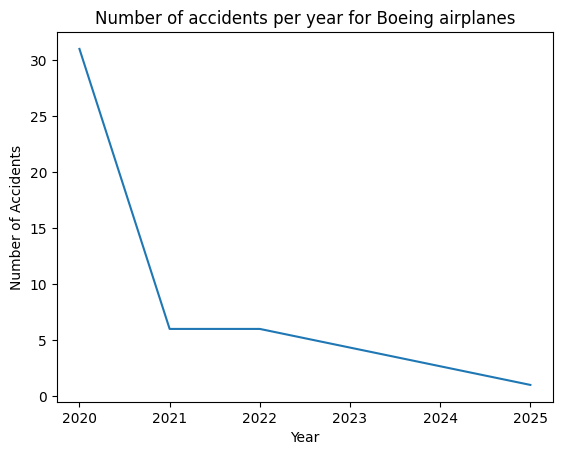

In [ ]:
# Number of accidents per year of Beoing airplanes
boeing = avallclean[['acft_make', 'lchg_date']]
boeing['lchg_date'] = pd.to_datetime(boeing['lchg_date'])
boeing['year'] = boeing['lchg_date'].dt.year

boeing = boeing[boeing['acft_make'] == 'Boeing']
boeing = boeing.groupby('year').size().reset_index(name='count')

# Lineplot
sns.lineplot(data=boeing, x='year', y='count')
plt.title('Number of accidents per year for Boeing airplanes')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

Number of times each aircraft make appears in the dataset

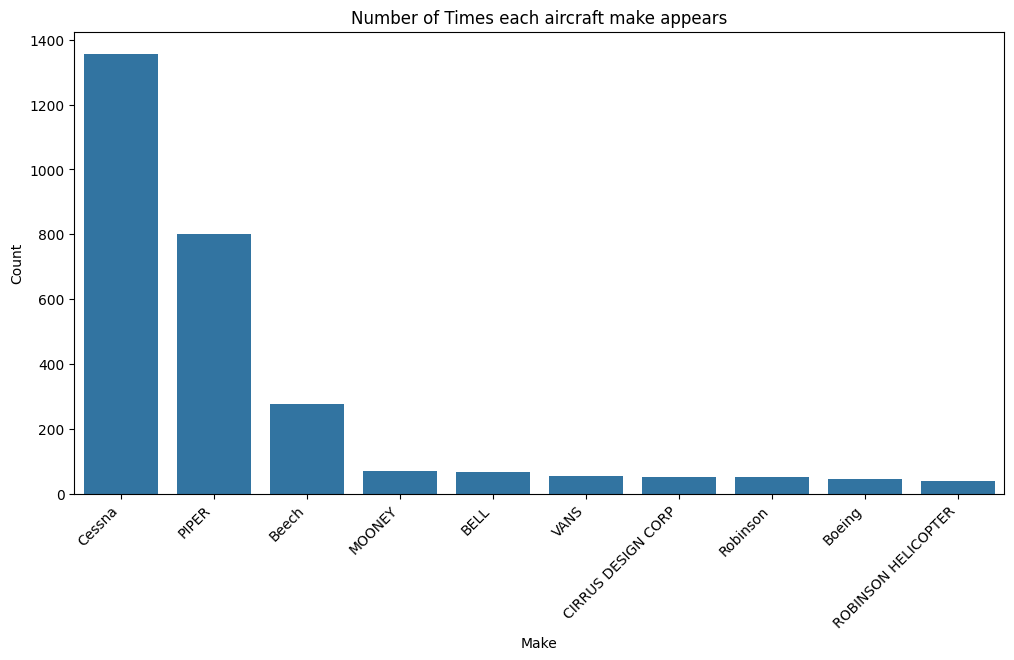

In [ ]:
# Number of times each aircraft make appears in the dataset
make_count = avallclean['acft_make'].value_counts()
make_count = make_count.head(10)

make = make_count.reset_index()
make.columns = ['Make', 'Count']

# Histogram
plt.figure(figsize=(12, 6))
sns.barplot(data=make, x='Make', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Times each aircraft make appears')
plt.show()

Histogram of monthly counts of records in the dataset by year

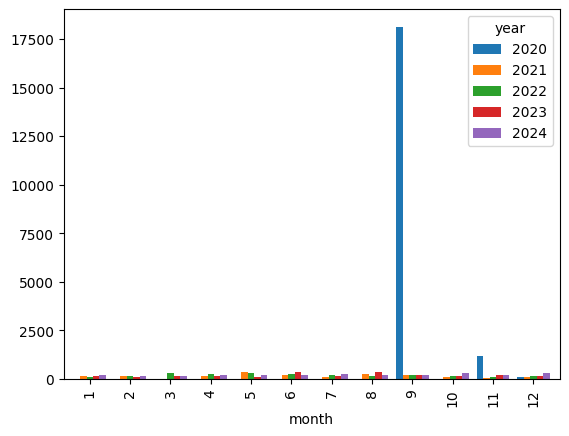

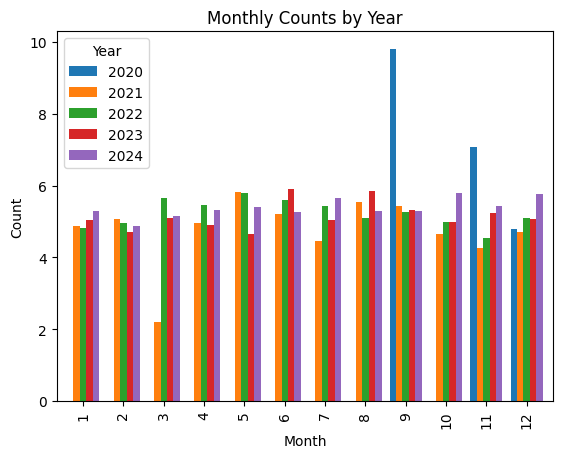

In [ ]:
# Histogram of monthly counts of records in the dataset by year
dates = avallFrame['lchg_date']
dates = dates.reset_index()
dates['lchg_date'] = pd.to_datetime(dates['lchg_date'])


dates['year'] = dates['lchg_date'].dt.year
dates['month'] = dates['lchg_date'].dt.month

# Group by year and month, get counts
pre = dates[dates['year'] != 2025]
grouped = pre.groupby(['year', 'month']).size().unstack(fill_value=0)

# Applying natural log
grouped_log = np.log1p(grouped)

grouped.T.plot(kind='bar', width = .8) # Plot without natural log
grouped_log.T.plot(kind='bar', width = .8) # Plot with natural log
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts by Year')
plt.legend(title='Year')
plt.show()

Histogram of time between last inspection and launching date

<ipython-input-299-6768e5313dab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet['lchg_date'] = bet['lchg_date'].str.split(' ').str[0]
<ipython-input-299-6768e5313dab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet['date_last_insp'] = pd.to_datetime(bet['date_last_insp'])
<ipython-input-299-6768e5313dab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

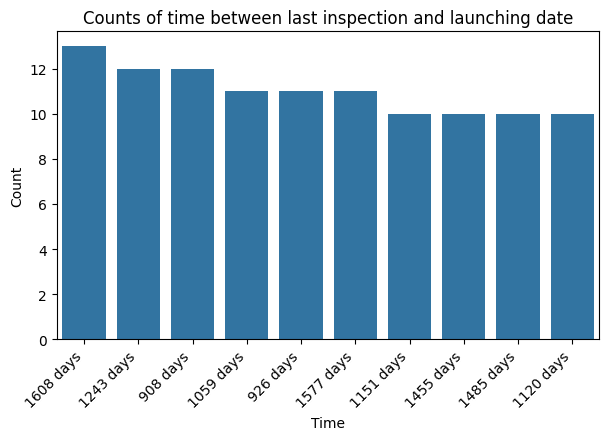

In [ ]:
# Histogram of time between last inspection and launching date
bet = avallFrame[['date_last_insp', 'lchg_date']]
bet['lchg_date'] = bet['lchg_date'].str.split(' ').str[0]

bet['date_last_insp'] = pd.to_datetime(bet['date_last_insp'])
bet['lchg_date'] = pd.to_datetime(bet['lchg_date'])

avallclean['time_between_insp_and_lchg'] = bet['lchg_date'] - bet['date_last_insp']

diff_counts = avallclean['time_between_insp_and_lchg'].value_counts().head(10)

diff_counts = diff_counts.reset_index()
diff_counts.columns = ['Time', 'Count']

diff_counts

# Histrogram
plt.figure(figsize=(7, 4))
sns.barplot(data=diff_counts, x='Time', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Counts of time between last inspection and launching date')
plt.show()

Box plot of amount of times we see the different damage types

<ipython-input-300-46e17c82dbe0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='damage', y='days_between', data=avallclean, palette=['darkorange', 'firebrick', 'gold'])


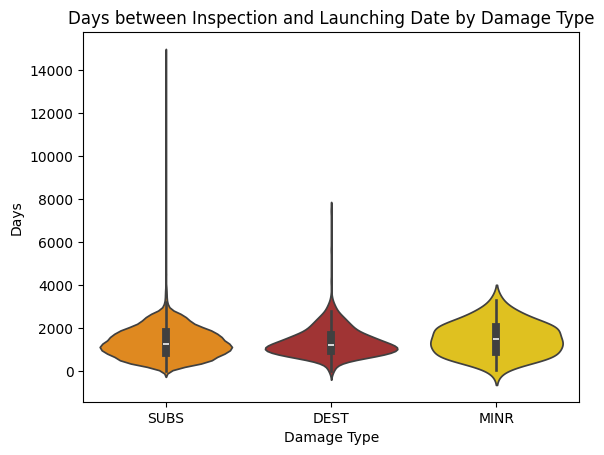

In [ ]:
# Box plot of amount of times we see the different damage types
avallclean['days_between'] = avallclean['time_between_insp_and_lchg'].dt.days

# Violin plot
sns.violinplot(x='damage', y='days_between', data=avallclean, palette=['darkorange', 'firebrick', 'gold'])
plt.title('Days between Inspection and Launching Date by Damage Type')
plt.xlabel('Damage Type')
plt.ylabel('Days')
plt.show()

## Pre-processing

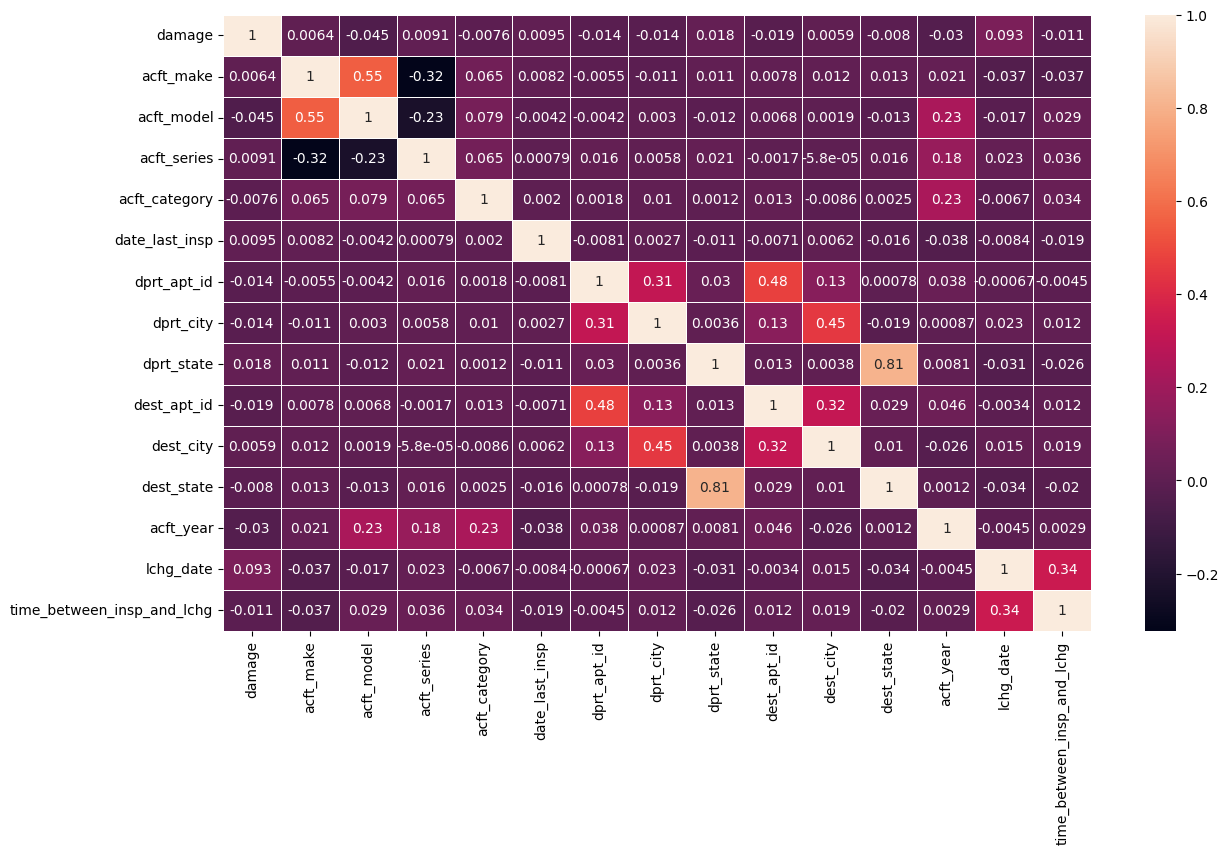

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Turning all string values into numbers
le = LabelEncoder()
avallclean['damage'] = le.fit_transform(avallclean['damage'])
avallclean['acft_make'] = le.fit_transform(avallclean['acft_make'])
avallclean['acft_model'] = le.fit_transform(avallclean['acft_model'])
avallclean['acft_series'] = le.fit_transform(avallclean['acft_series'])
avallclean['acft_category'] = le.fit_transform(avallclean['acft_category'])
avallclean['date_last_insp'] = le.fit_transform(avallclean['date_last_insp'])
avallclean['dprt_apt_id'] = le.fit_transform(avallclean['dprt_apt_id'])
avallclean['dprt_city'] = le.fit_transform(avallclean['dprt_city'])
avallclean['dprt_state'] = le.fit_transform(avallclean['dprt_state'])
avallclean['dest_apt_id'] = le.fit_transform(avallclean['dest_apt_id'])
avallclean['dest_city'] = le.fit_transform(avallclean['dest_city'])
avallclean['dest_state'] = le.fit_transform(avallclean['dest_state'])
avallclean['acft_year'] = le.fit_transform(avallclean['acft_year'])
avallclean['lchg_date'] = le.fit_transform(avallclean['lchg_date'])
avallclean['time_between_insp_and_lchg'] = le.fit_transform(avallclean['time_between_insp_and_lchg'])

avallclean

# Creating a correlation dataframe out of the numerical columns
num_columns = avallclean[["damage","acft_make","acft_model","acft_series",
                          "acft_category", "date_last_insp", "dprt_apt_id",
                          "dprt_city", "dprt_state", "dest_apt_id", "dest_city",
                          "dest_state", "acft_year", "lchg_date",
                          "time_between_insp_and_lchg"]]
num_columns.corr()

# Creating a heatmap of the correlations
plt.figure(figsize=(14, 8))
sns.heatmap(num_columns.corr(), annot=True, linewidth=0.5)
plt.show()

## Machine Learning model work

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

# Drop the target column in order to make the other columns predictors of damage
x = avallclean.drop('damage', axis=1)
y = avallclean['damage']

# Splitting training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

train_data = pd.concat([X_train, Y_train], axis=1)

# Dividing training data based on damage values
minr = train_data[train_data['damage'] == 1]
dest = train_data[train_data['damage'] == 0]
subs = train_data[train_data['damage'] == 2]

# Upsampling MINR and DEST values
minr_upsampled = resample(minr, replace=True, n_samples=500, random_state=42)
dest_upsampled = resample(dest, replace=True, n_samples=500, random_state=42)

# Merging training sets
upsampled_train = pd.concat([minr_upsampled, dest_upsampled, subs])
upsampled_train = upsampled_train.sample(frac=1, random_state=42)

# Readying training set by dropping damage column
x_train_bal = upsampled_train.drop('damage', axis=1)
y_train_bal = upsampled_train['damage']

# Models
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(weights='uniform')
}

for model_name, model in models.items():
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    scores = cross_val_score(model, x, y, cv=10, scoring='accuracy', n_jobs=-1)
    print(models[model_name])
    print(classification_report(Y_test, y_pred, zero_division=1))
    print(scores, '\n')

    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    print(f"Mean Accuracy: {mean_score:.4f}")
    print(f"Standard Deviation: {std_dev:.4f}")
    print('\n')

RandomForestClassifier(class_weight='balanced')
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        93
           1       1.00      0.00      0.00        10
           2       0.89      1.00      0.94       802

    accuracy                           0.89       905
   macro avg       0.96      0.34      0.32       905
weighted avg       0.90      0.89      0.84       905

[0.88520971 0.88741722 0.88520971 0.88300221 0.88495575 0.88495575
 0.88495575 0.88495575 0.88495575 0.88495575] 

Mean Accuracy: 0.8851
Standard Deviation: 0.0010


DecisionTreeClassifier(class_weight='balanced')
              precision    recall  f1-score   support

           0       0.18      0.19      0.19        93
           1       0.00      0.00      0.00        10
           2       0.90      0.88      0.89       802

    accuracy                           0.80       905
   macro avg       0.36      0.36      0.36       905
weighted avg       0.81      0.